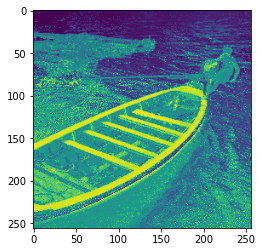

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy
img = Image.open("ImagePCX/1.pcx")
plt.imshow(img)
plt.show()

In [51]:
array1 = numpy.array(img)
array1[3, 1264, 1]

IndexError: too many indices for array

In [52]:
type(array1)

numpy.ndarray

In [53]:
im = Image.fromarray(array1, 'RGB')
#im.show()
plt.imshow(im)
plt.show()

ValueError: not enough image data

In [20]:
f = open("ImagePCX/Lena_256.pcx", "rb")

In [21]:
word = f.read(128)

In [22]:
from struct import unpack_from
class Header():
	def __init__(self, h):
		self.h = h
		self.read()
	def read(self):
		self.Version = self.h[1]											# 5->palette=-768, start with 0x0C
		self.Encoding = self.h[2]										# 1->RLE
		self.BitsPerPixel = self.h[3]									#color: 1->B/W 2, 4, 8
		self.XStart = unpack_from("<H", self.h, 4)[0]					#Left of image
		self.YStart = unpack_from("<H", self.h, 6)[0]					#Top of Image
		self.XEnd = unpack_from("<H", self.h, 8)[0]						#Right of Image
		self.YEnd = unpack_from("<H", self.h, 10)[0]						#Bottom of image
		self.HorzRes = unpack_from("<H", self.h, 12)[0]					
		self.VertRes = unpack_from("<H", self.h, 14)[0]
		self.Palette = list(self.h[16:63])
		self.Reserved = self.h[64]
		self.NumBitPlanes = self.h[65]									
		self.BytesPerLine = unpack_from("<H", self.h, 66)[0]
		self.PaletteType = unpack_from("<H", self.h, 68)[0]				#1->color, 2->gray
		self.HorzScreenSize = unpack_from("<H", self.h, 70)[0]
		self.VertScreenSize = unpack_from("<H", self.h, 72)[0]

In [23]:
header = Header(word)

In [24]:
header.Encoding, header.Version, header.BitsPerPixel, header.NumBitPlanes, header.BytesPerLine

(1, 5, 8, 1, 256)

In [25]:
XSize = header.XEnd - header.XStart + 1
YSize = header.YEnd - header.YStart + 1
TotalBytes = header.NumBitPlanes * header.BytesPerLine
XSize, YSize, TotalBytes

(256, 256, 256)

In [26]:
data = f.read()

In [27]:
len(data), XSize * YSize

(70717, 65536)

In [28]:
f.seek(-769, 2)
s = f.read()

In [29]:
s[0]

12

In [30]:
import numpy as np
Extend_Palette = np.zeros((256, 3))
#if (s[0] == 12) and (len(s) == 769):
s = s[1:]
for i in range(0, 256):
    #print(i, [s[i], s[i+1], s[i+2]])
    Extend_Palette[i] = [s[i * 3], s[i * 3 + 1], s[i * 3 + 2]]

In [31]:
Extend_Palette

array([[ 74.,   9.,  52.],
       [164., 133., 139.],
       [152.,  41.,  66.],
       [247., 197.,  12.],
       [163.,  83.,  87.],
       [223., 132.,   8.],
       [203.,  91.,   8.],
       [107.,  65.,  87.],
       [208., 136., 126.],
       [103.,  20.,  59.],
       [211., 164., 138.],
       [167., 108.,  89.],
       [201.,  88.,  93.],
       [106.,  38.,  71.],
       [235., 165., 131.],
       [196.,  65.,  75.],
       [202., 109., 110.],
       [197., 163., 136.],
       [152.,  87., 132.],
       [142.,  98., 134.],
       [108.,  46., 105.],
       [158., 109., 147.],
       [157.,  53.,  92.],
       [202., 194., 195.],
       [155., 133., 166.],
       [254., 225., 176.],
       [231., 138., 124.],
       [237., 195., 141.],
       [123.,  70., 125.],
       [223., 110., 102.],
       [229., 199., 185.],
       [ 85.,  34.,  75.],
       [130.,  43.,  68.],
       [188.,  84.,  87.],
       [211., 149., 137.],
       [209., 170., 172.],
       [179., 136., 159.],
 

In [32]:
data = data[0:len(data) - 769]

In [33]:
len(data)

69948

In [34]:
array1[3, 1264]

NameError: name 'array1' is not defined

In [35]:
import numpy as np
image = np.zeros((YSize, XSize, 3), dtype=np.uint8)
data_index = 0
for i in range(0, YSize):
    image_byte = 0
    while(image_byte < TotalBytes):
        #print([i, image_byte], data_index)
        if(data_index >= len(data) or data_index + 1 >= len(data)):
            break
        if(data[data_index] > 0xC0):
            length = data[data_index] - 192
            value = data[data_index + 1]
            data_index += 2
        else:
            length = 1
            value = data[data_index]
            data_index += 1
        #print(length, value)
        value = Extend_Palette[value]
        #print(value)
        #print("=======================")
        if(image_byte + length > XSize):
            image[i, image_byte:XSize] = value
            image_byte = XSize
        else:
            image[i, image_byte:image_byte + length] = value
            image_byte += length
            
        if(image_byte >= XSize):
            break
            #if(image_byte >= TotalBytes / 3):
                #break
#image = Image.fromarray((image).astype(np.uint8))

In [36]:
image

array([[[222, 135, 126],
        [222, 135, 126],
        [231, 138, 124],
        ...,
        [235, 152, 126],
        [235, 152, 126],
        [190,  95,  91]],

       [[222, 135, 126],
        [221, 151, 136],
        [231, 138, 124],
        ...,
        [231, 138, 124],
        [235, 152, 126],
        [190,  95,  91]],

       [[222, 135, 126],
        [222, 135, 126],
        [222, 135, 126],
        ...,
        [231, 138, 124],
        [235, 152, 126],
        [190,  95,  91]],

       ...,

       [[ 92,  19,  54],
        [106,  38,  71],
        [106,  38,  71],
        ...,
        [130,  43,  68],
        [142,  82,  80],
        [165,  71,  82]],

       [[ 80,  18,  54],
        [ 85,  34,  75],
        [ 92,  24,  66],
        ...,
        [142,  69,  80],
        [165,  71,  82],
        [166,  62,  77]],

       [[ 80,  18,  54],
        [ 95,  35,  75],
        [106,  38,  71],
        ...,
        [165,  71,  82],
        [177,  64,  76],
        [  0,   0,   0]]

# NUmbitPlane = 1, BitPerPixel = 1
## colors = 2
## Black & White Color

In [ ]:
def BW_image(self, header, data): #Process B/W image
	XSize = header.XEnd - header.XStart + 1
	YSize = header.YEnd - header.YStart + 1
	TotalBytes = header.NumBitPlanes * header.BytesPerLine
	image = np.zeros((YSize, XSize, 3))
	data_index = 0
	image_size = XSize * YSize
	for i in range(0, YSize):
		image_index = 0
		image_byte = 0
		while(1):
			if(data[data_index] > 0xC0):
				length = data[data_index] - 192
				value = data[data_index + 1]
				data_index = data_index + 2
			else:
				length = 1
				value = data[data_index]
				data_index += 1
			while(length > 0):
				take = 128
				for t in range(0, 8):
					if(value & take == take):
						image[i, image_index] = [1,1,1]
					else:
						image[i, image_index] = [0,0,0]
					take >>= 1
					image_index += 1
					if(image_index >= XSize):
						break
				length -= 1
				image_byte += 1
			if(image_byte >= TotalBytes):
				break
	image = Image.fromarray((image * 255).astype(np.uint8))
	return image

# NUmbitPlane = 1, BitPerPixel = 2
## colors = 4
## CGA Palette

# NUmbitPlane = 1, BitPerPixel = 8
## colors = 256
## CGA Palette
    

In [173]:
def _24b_image(header, data):
    XSize = header.XEnd - header.XStart + 1
    YSize = header.YEnd - header.YStart + 1
    TotalBytes = header.NumBitPlanes * header.BytesPerLine
    image = np.zeros((YSize, XSize, 3), dtype=np.uint8)
    data_index = 0
    for i in range(0, YSize):
        image_byte = 0
        l = 0
        for l in range(0, 3):
            image_byte = 0
            while(image_byte < TotalBytes / 3):
                #print(data_index)
                if(data_index >= len(data)):
                    break
                if(data[data_index] > 0xC0):
                    length = data[data_index] - 192
                    value = data[data_index + 1]
                    data_index += 2
                else:
                    length = 1
                    value = data[data_index]
                    data_index += 1
                #print([i, image_byte, l], length, value)
                #print("=======================")
                if(image_byte + length <= XSize):
                    image[i, image_byte:image_byte + length, l] = value
                    image_byte += length
                else:
                    image[i, image_byte:XSize, l] = value
                    image_byte = XSize
                
                #if(image_byte >= XSize):
                    #if(image_byte < TotalBytes / 3):
                        #if(data[data_index] > 0xC0):
                            #data_index += 2
                        #else:
                            #data_index += 1
                        #print("*******************")
                    break
    #image = Image.fromarray(image, 'RGB')
    return image

In [174]:
image = _24b_image(header, data)

In [175]:
image

array([[[ 96,  73, 107],
        [ 96, 119, 192],
        [ 26, 119, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 26, 119, 192],
        [ 26,  16, 107],
        [ 26, 137, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[192, 119, 192],
        [ 96,  16,  96],
        [192,  16,  96],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[110,   0,   0],
        [110,   0,   0],
        [166,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [32]:
import math
value = 0.5
new_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
for i in range(image.shape[0]):
    for l in range(image.shape[1]):
        for j in range(3):
            pixel = math.pow((image[i, l, j] / 255.0), value) * 255.0
            if(pixel > 255):
                pixel = 255
            elif(pixel < 0):
                pixel = 0
            new_img[i, l, j] = pixel

In [35]:
def gamma_correction(img: np.ndarray, gamma: float=1.0):
    igamma = 1.0 / gamma
    imin, imax = img.min(), img.max()

    img_c = img.copy()
    img_c = ((img_c - imin) / (imax - imin)) ** igamma
    img_c = img_c * (imax - imin) + imin
    return img_c

In [40]:
new_img_1 = gamma_correction(image, gamma=2).astype(np.uint8)

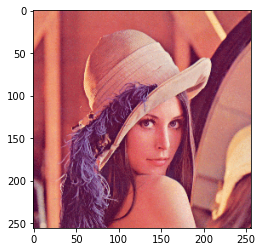

In [26]:
r_image = Image.fromarray(image, 'RGB')
plt.imshow(r_image)
plt.show()

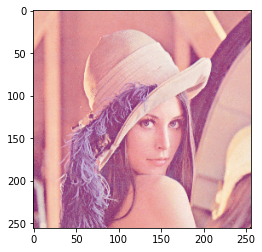

In [34]:
n_image = Image.fromarray(new_img, 'RGB')
plt.imshow(n_image)
plt.show()

In [168]:
Extend_Palette

array([[ 74.,   9.,  52.],
       [164., 133., 139.],
       [152.,  41.,  66.],
       [247., 197.,  12.],
       [163.,  83.,  87.],
       [223., 132.,   8.],
       [203.,  91.,   8.],
       [107.,  65.,  87.],
       [208., 136., 126.],
       [103.,  20.,  59.],
       [211., 164., 138.],
       [167., 108.,  89.],
       [201.,  88.,  93.],
       [106.,  38.,  71.],
       [235., 165., 131.],
       [196.,  65.,  75.],
       [202., 109., 110.],
       [197., 163., 136.],
       [152.,  87., 132.],
       [142.,  98., 134.],
       [108.,  46., 105.],
       [158., 109., 147.],
       [157.,  53.,  92.],
       [202., 194., 195.],
       [155., 133., 166.],
       [254., 225., 176.],
       [231., 138., 124.],
       [237., 195., 141.],
       [123.,  70., 125.],
       [223., 110., 102.],
       [229., 199., 185.],
       [ 85.,  34.,  75.],
       [130.,  43.,  68.],
       [188.,  84.,  87.],
       [211., 149., 137.],
       [209., 170., 172.],
       [179., 136., 159.],
 

In [177]:
palette = np.zeros((256, 256, 3), dtype=np.uint8)
count = 0
for i in range(0, 256, 16):
    for l in range(0, 256, 16):
        palette[i:i+16, l:l+16] = Extend_Palette[count]
        count += 1

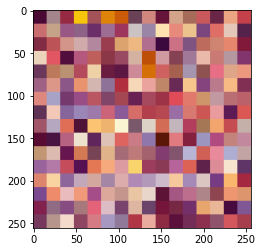

In [178]:
p_image = Image.fromarray(palette, 'RGB')
plt.imshow(p_image)
plt.show()

In [279]:
new_img = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
for i in range(image.shape[1]):
    for j in range(image.shape[0]):
        new_img[j, i] = 0.3 * int(image[j, i, 0]) + 0.3 * int(image[j, i, 1]) + 0.4 * int(image[j, i, 2])

grey_h = [0] * 256
for i in range(int(new_img.shape[0])):
    for l in range(int(new_img.shape[1])):
        grey_h[new_img[i, l]] += 1

In [292]:
max(grey_h)

2146

In [280]:
grey_p = [0] * 256
for i in range(256):
    grey_p[i] = grey_h[i] / (new_img.shape[0] * new_img.shape[1])

sumT = 0
for i in range(256):
    sumT += i * grey_p[i]

In [281]:
wB, wF = 0, 0
sumB, sumF = 0, 0
meanB, meanF = 0, 0
varB, varF = 0, 0
T = None
minVariance = 2147483647
for i in range(0,256):
    wB += grey_p[i]
    sumB += i * grey_p[i]
    meanB = sumB / wB
    varB += pow(i - meanB, 2) * grey_p[i] / wB
    wF = 1 - sumB
    sumF = sumT - sumB
    meanF = sumF / wF
    varF = 0
    for l in range(i, 256):
        varF += ((l - meanF) ** 2) * grey_p[l]
    varF /= wF
    
    t = wB * varB + wF * varF
    
    if (t < minVariance):
        T = i
        minVariance = t
    

In [319]:
new_img_c = np.zeros((new_img.shape[0], new_img.shape[1]), dtype=np.uint8)
for i in range(7, 255):
    if grey_h[i] != 0:
        old_L = i
        break
for i in range(248, 0, -1):
    if grey_h[i] != 0:
        old_R = i
        break
for i in range(new_img.shape[0]):
    for l in range(new_img.shape[1]):
        value = ((new_img[i, l] - old_L) / (old_R - old_L)) * 255
        if(value > 255): value = 255
        if(value < 0): value = 0
        new_img_c[i, l] = ((new_img[i, l] - old_L) / (old_R - old_L)) * 255
        

[[255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


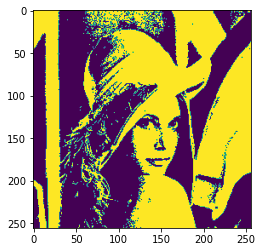

[[  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 ...
 [  0 255 255 ... 255 255 255]
 [  0 255   0 ... 255 255 255]
 [  0 255 255 ... 255 255   0]]


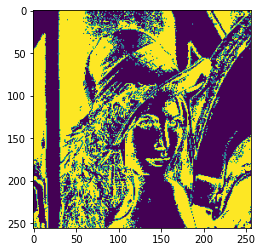

[[  0   0 255 ... 255 255 255]
 [  0 255 255 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255   0   0 ...   0 255 255]
 [255   0 255 ...   0 255 255]
 [255   0   0 ... 255 255   0]]


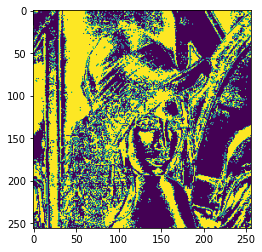

[[255 255   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ...   0   0 255]
 ...
 [255   0   0 ...   0   0   0]
 [255   0 255 ... 255   0   0]
 [255   0   0 ...   0   0   0]]


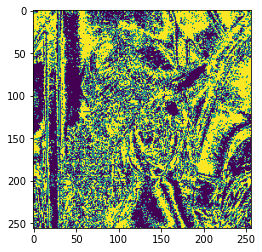

[[255 255   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ...   0   0 255]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0 255 ... 255   0   0]
 [  0   0   0 ...   0   0   0]]


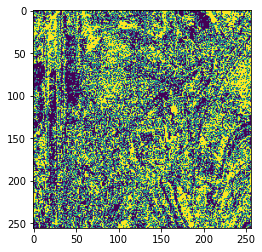

[[255 255   0 ... 255 255   0]
 [255 255   0 ...   0 255   0]
 [255 255 255 ...   0 255   0]
 ...
 [255 255 255 ... 255   0 255]
 [  0   0 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]]


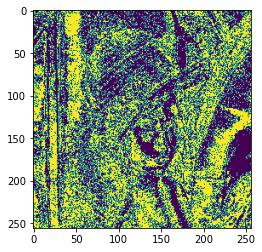

[[  0   0   0 ... 255 255   0]
 [  0 255   0 ...   0 255   0]
 [  0   0   0 ...   0 255   0]
 ...
 [255 255 255 ... 255 255 255]
 [255   0   0 ... 255 255 255]
 [255   0 255 ... 255 255   0]]


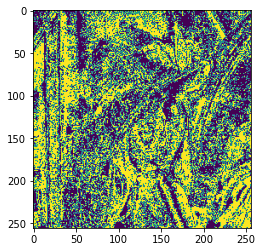

[[255 255   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ...   0   0 255]
 ...
 [  0 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255   0   0]]


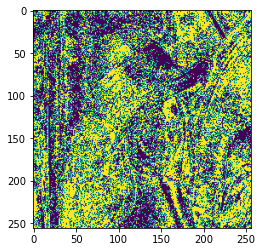

In [349]:
i = 128
row, col = 0, 0
while(i >= 1):
    new_img_B = np.zeros((new_img.shape[0], new_img.shape[1]), dtype=np.uint8)
    new_img_B = (new_img & int(i))# / int(i) * 255).astype(int)
    new_img_B[new_img_B != 0] = new_img_B[new_img_B != 0] * (256 / i) - 1
    print(new_img_B)
    img_PIL = Image.fromarray(new_img_B, 'L')
    plt.imshow(img_PIL)
    plt.show()
    i /= 2
    

In [372]:
def Gray_Code(val):
    result = (val & 128 == 128) * 128
    last_b = val & 128 == 128
    i = 64
    while(i >= 1):
        b = (val & i) == i
        result += (last_b ^ b) * i
        i = int(i / 2)
        last_b = b
    return result

In [311]:
grey_h[7:255]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 346,
 0,
 0,
 0,
 183,
 365,
 328,
 0,
 826,
 1116,
 0,
 0,
 683,
 0,
 0,
 658,
 1825,
 0,
 332,
 245,
 344,
 1013,
 0,
 227,
 1019,
 0,
 562,
 0,
 285,
 240,
 790,
 0,
 0,
 303,
 482,
 75,
 0,
 0,
 644,
 316,
 37,
 205,
 523,
 336,
 183,
 739,
 199,
 296,
 0,
 0,
 882,
 270,
 117,
 0,
 1253,
 0,
 82,
 1520,
 936,
 6,
 113,
 0,
 356,
 1987,
 346,
 248,
 0,
 0,
 1120,
 99,
 341,
 852,
 0,
 361,
 11,
 1158,
 550,
 218,
 997,
 712,
 404,
 537,
 584,
 231,
 571,
 1880,
 0,
 206,
 426,
 1298,
 323,
 0,
 717,
 346,
 1468,
 1114,
 799,
 58,
 672,
 30,
 849,
 988,
 1293,
 827,
 705,
 252,
 95,
 793,
 2146,
 480,
 638,
 0,
 659,
 386,
 150,
 1000,
 0,
 855,
 84,
 167,
 0,
 1160,
 549,
 201,
 50,
 214,
 0,
 369,
 305,
 102,
 0,
 528,
 0,
 642,
 177,
 17,
 209,
 205,
 105,
 0,
 935,
 227,
 12,
 0,
 389,
 0,
 0,
 500,
 425,
 266,
 398,
 460,
 0,
 

In [373]:
Gray_Code(147)

64 192 False True
32 192 False False
16 208 True False
8 216 False True
4 216 False False
2 218 True False
1 218 True True


218

In [291]:
ret1

118.0

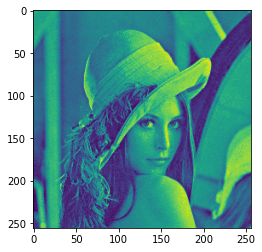

In [321]:
n_image = Image.fromarray(new_img_c, 'L')
plt.imshow(n_image)
plt.show()

In [289]:
h = new_img.shape[0]
w = new_img.shape[1]
threshold_t = 0
max_g = 0

for t in range(255):
    n0 = new_img[np.where(new_img < t)]
    n1 = new_img[np.where(new_img >= t)]
    w0 = len(n0) / (h * w)
    w1 = len(n1) / (h * w)
    u0 = np.mean(n0) if len(n0) > 0 else 0.
    u1 = np.mean(n1) if len(n0) > 0 else 0.
        
    g = w0 * w1 * (u0 - u1) ** 2
    if g > max_g:
        max_g = g
        threshold_t = t

C:\Users\allen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\allen\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [290]:
threshold_t

119

In [294]:
np.arange(0,max(grey_h))

array([   0,    1,    2, ..., 2143, 2144, 2145])

In [295]:
np.full((max(grey_h)), 121)

array([121, 121, 121, ..., 121, 121, 121])

In [384]:
def Kittler(im):
    out = np.zeros((im.shape[0], im.shape[1]), dtype=np.uint8)
    h,g = np.histogram(im.ravel(),256,[0,256])
    h = h.astype(np.float)
    g = g.astype(np.float)
    g = g[:-1]
    c = np.cumsum(h)
    m = np.cumsum(h * g)
    s = np.cumsum(h * g**2)
    sigma_f = np.sqrt(s/c - (m/c)**2)
    cb = c[-1] - c
    mb = m[-1] - m
    sb = s[-1] - s
    sigma_b = np.sqrt(sb/cb - (mb/cb)**2)
    p =  c / c[-1]
    v = p * np.log(sigma_f) + (1-p)*np.log(sigma_b) - p*np.log(p) - (1-p)*np.log(1-p)
    v[~np.isfinite(v)] = np.inf
    idx = np.argmin(v)
    t = g[idx]
    print(t)
    out[:,:] = 0
    out[im >= t] = 255
    return out

In [385]:
a = Kittler(new_img)

75.0


<ipython-input-384-60356d041355>:14: RuntimeWarning: invalid value encountered in true_divide
  sigma_b = np.sqrt(sb/cb - (mb/cb)**2)
<ipython-input-384-60356d041355>:16: RuntimeWarning: divide by zero encountered in log
  v = p * np.log(sigma_f) + (1-p)*np.log(sigma_b) - p*np.log(p) - (1-p)*np.log(1-p)
<ipython-input-384-60356d041355>:16: RuntimeWarning: invalid value encountered in multiply
  v = p * np.log(sigma_f) + (1-p)*np.log(sigma_b) - p*np.log(p) - (1-p)*np.log(1-p)


In [390]:
threshold_t = -1
MinSigma = 1e+20
for i in range(256):
    PixelBack, PixelFore = 0, 0
    OmegaBack, OmegaFore = 0, 0
    for l in range(0, i + 1):
        PixelBack += grey_h[l]
        OmegaBack = OmegaBack + l * grey_h[l]
    for l in range(i + 1, 256):
        PixelFore += grey_h[l]
        OmegaFore = OmegaFore + l * grey_h[l]
    if(PixelBack != 0): OmegaBack = OmegaBack / PixelBack
    if(PixelFore != 0): OmegaFore = OmegaFore / PixelFore
    sigmaBack, sigmaFore = 0, 0
    for l in range(0, i + 1):
        sigmaBack = sigmaBack + (l - OmegaBack) * (l - OmegaBack) * grey_h[l]
    for l in range(i + 1, 256):
        sigmaFore = sigmaFore + (l - OmegaFore) * (l - OmegaFore) * grey_h[l]
    #print(PixelBack, PixelFore, OmegaBack, OmegaFore, sigmaBack, sigmaFore)
    if(sigmaBack == 0 or sigmaFore == 0):
        if(threshold_t == - 1): threshold_t = i
    else:
        if(PixelBack != 0): sigmaBack = math.sqrt(sigmaBack / PixelBack)
        if(PixelFore != 0): sigmaFore = math.sqrt(sigmaFore / PixelFore)
        Sigma = 1 + 2 * (PixelBack * math.log(sigmaBack / PixelBack) + PixelFore * math.log(sigmaFore / PixelFore))
        if(Sigma < MinSigma):
            MinSigma = Sigma
            threshold_t = i

In [391]:
threshold_t

75

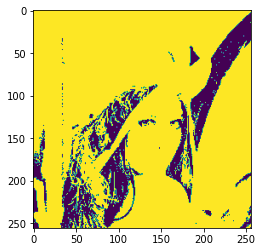

In [381]:
a_image = Image.fromarray(a, 'L')
plt.imshow(a_image)
plt.show()

In [400]:
if(len(image.shape) == 3):
    new_img = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_img[i, j] = 0.3 * int(image[i, j, 0]) + 0.3 * int(image[i, j, 1]) + 0.4 * int(image[i, j, 2])


In [403]:
new_img_1

array([[200, 200, 206, ..., 215, 215, 110],
       [200, 215, 206, ..., 206, 215, 110],
       [200, 200, 200, ..., 206, 215, 110],
       ...,
       [ 12,  39,  39, ...,  47,  71,  80],
       [  4,  28,  24, ...,  64,  80,  71],
       [  4,  37,  39, ...,  80,  77,   0]], dtype=uint8)

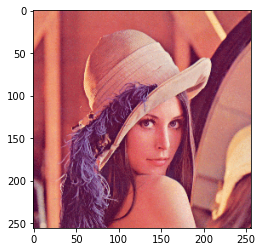

In [38]:
one_ = Image.fromarray(image, 'RGB')
plt.imshow(one_)
plt.show()

In [415]:
max(grey_h)

2146

In [37]:
image

array([[[222, 135, 126],
        [222, 135, 126],
        [231, 138, 124],
        ...,
        [235, 152, 126],
        [235, 152, 126],
        [190,  95,  91]],

       [[222, 135, 126],
        [221, 151, 136],
        [231, 138, 124],
        ...,
        [231, 138, 124],
        [235, 152, 126],
        [190,  95,  91]],

       [[222, 135, 126],
        [222, 135, 126],
        [222, 135, 126],
        ...,
        [231, 138, 124],
        [235, 152, 126],
        [190,  95,  91]],

       ...,

       [[ 92,  19,  54],
        [106,  38,  71],
        [106,  38,  71],
        ...,
        [130,  43,  68],
        [142,  82,  80],
        [165,  71,  82]],

       [[ 80,  18,  54],
        [ 85,  34,  75],
        [ 92,  24,  66],
        ...,
        [142,  69,  80],
        [165,  71,  82],
        [166,  62,  77]],

       [[ 80,  18,  54],
        [ 95,  35,  75],
        [106,  38,  71],
        ...,
        [165,  71,  82],
        [177,  64,  76],
        [  0,   0,   0]]

In [39]:
img = np.zeros((image.shape[0], image.shape[1]), dtype = np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        img[i, j] = 0.3 * int(image[i, j, 0]) + 0.3 * int(image[i, j, 1]) + 0.4 * int(image[i, j, 2])

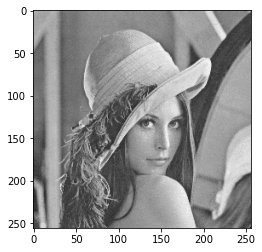

In [351]:
im1 = Image.fromarray(img, 'L')
plt.imshow(im1, cmap = 'gray')
plt.show()

In [333]:
class Node(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    
def huffman_code_tree(node, binString=''):
    if type(node) is str:
        return {node: str(int(binString))}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, binString + '0'))
    d.update(huffman_code_tree(r, binString + '1'))
    return d

In [334]:
grey_h = {}
for i in range(img.shape[0]):
    for l in range(img.shape[1]):
        if(str(img[i, l]) in grey_h):
            grey_h[str(img[i, l])] += 1
        else:
            grey_h[str(img[i, l])] = 1

In [335]:
type(grey_h)

dict

In [336]:
grey_h = sorted(grey_h.items(), key = lambda x: x[1], reverse = True)
N = grey_h

In [337]:
while(len(N) > 1):
    #freq最小的兩個
    (key1, n1) = N[-1]
    (key2, n2) = N[-2]
    N = N[:-2]
    node = Node(key1, key2)
    N.append((node, n1 + n2))
    N = sorted(N, key = lambda x: x[1], reverse = True)

In [338]:
(d, f) = grey_h[0]

In [201]:
(d, f)

('153', 2146)

In [202]:
huffmanCode[d]

'10100'

In [339]:
huffmanCode = huffman_code_tree(N[0][0])

In [340]:
huffmanCode

{'139': '0',
 '102': '1',
 '172': '1000',
 '49': '10010',
 '220': '1001100',
 '169': '1001101',
 '114': '100111',
 '158': '1010',
 '189': '1011',
 '75': '110',
 '152': '111',
 '195': '10000',
 '91': '100010',
 '168': '100011',
 '141': '1001',
 '125': '10100',
 '182': '101010',
 '86': '101011',
 '53': '1011',
 '148': '1100',
 '132': '110100',
 '174': '1101010',
 '183': '1101011',
 '181': '110110',
 '170': '110111',
 '145': '1110',
 '193': '11110',
 '133': '11111',
 '116': '10000',
 '162': '10001',
 '95': '10010',
 '122': '1001100',
 '68': '1001101',
 '206': '100111',
 '61': '1010',
 '186': '1011000',
 '105': '10110010',
 '97': '10110011',
 '196': '101101',
 '185': '10111',
 '130': '1100',
 '103': '11010',
 '128': '1101100',
 '74': '1101101',
 '154': '110111',
 '79': '111000',
 '64': '1110010',
 '110': '1110011',
 '146': '11101',
 '108': '1111',
 '123': '100000',
 '160': '100001',
 '192': '1000100',
 '142': '1000101000',
 '144': '10001010010',
 '224': '100010100110',
 '180': '10001010011

In [329]:
Huffman_Cost = 0
Fix_Cost = 0
test = huffmanCode
for f, code in huffmanCode.items():
    huffmanCode[f] = str(int(code))
for f, code in huffmanCode.items():
    #print(len(str(int(code))))
    Huffman_Cost += int(f) * len(code)
    Fix_Cost += int(f) * 8

In [405]:
img_test = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8)
a = np.array([[-1, 0], [0, 1]])
b = np.array([0, 0])
for i in range(1, img.shape[0] - 1):
    for l in range(1, img.shape[1] - 1):
        coord = np.dot(np.array([i, l]), a) + b
        x = int(coord[0])
        y = int(coord[1])
        if(0 < x < img.shape[0] and 0 < y < img.shape[1]):
            img_test[i, l] = img[x, y]

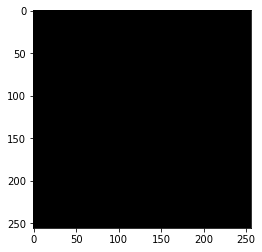

In [406]:
im_test = Image.fromarray(img_test, 'L')
plt.imshow(im_test, cmap = 'gray')
plt.show()

In [360]:
coor = np.dot(np.array([1, 5]), matrix)

In [191]:
import json

with open("HuffmanCode.txt", "w") as f:
    f.write(str(img.shape))
    f.write("\n")
    f.write(json.dumps(huffmanCode))
    f.write("\n\n")
    for i in range(img.shape[0]):
        for l in range(img.shape[1]):
            f.write(huffmanCode[str(img[i, l])] + " ")

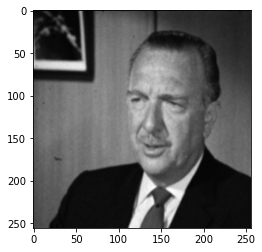

In [14]:
from PIL import Image
import numpy as np
im = Image.open("sequences/sequences1/6.1.01.tiff")
plt.imshow(im, cmap = 'gray')
plt.show()

In [15]:
img = np.array(im)

In [18]:
img[248:256, 248:256]

array([[18, 17, 17, 18, 18, 17, 18, 19],
       [17, 17, 17, 18, 18, 18, 19, 19],
       [17, 18, 18, 17, 18, 18, 18, 19],
       [18, 18, 18, 18, 19, 19, 18, 18],
       [18, 18, 19, 20, 20, 20, 18, 17],
       [18, 19, 20, 20, 20, 19, 16, 16],
       [19, 19, 20, 19, 17, 17, 15, 14],
       [19, 18, 19, 18, 16, 15, 13, 12]], dtype=uint8)

In [19]:
249+8

257

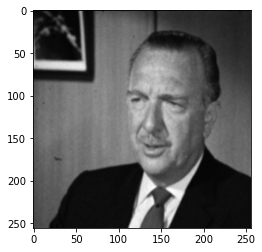

In [216]:
im2 = Image.fromarray(a1, 'L')
plt.imshow(im2, cmap = 'gray')
plt.show()

In [422]:
def Next_Image(img, motion_vector):
    img1 = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for i in range(len(motion_vector)):
        for l in range(len(motion_vector[0])):
            (x, y) = motion_vector[i][l]
            img1[i * 8 : (i + 1) * 8, l * 8 : (l + 1) * 8] = img[x - 4 : x + 4, y - 4 : y + 4]
    return img1

In [429]:
im1 = Image.open(r"C:\Users\allen\Desktop\碩士課程\影像處理\image-processing\sequences\sequences1\6.1.01.tiff")
img = np.array(im1)
All_img = [img]

All_Moction_Vector = []
total_file = 0
with open(r"C:\Users\allen\Desktop\碩士課程\影像處理\homework\optimal_motion_vector\6.1.txt", 'r') as fp:
    while(1):
        txt = fp.readline()
        total_file += 1
        if(len(txt) == 0):
            break
        else:
            motion_vector = eval(txt)
            All_Moction_Vector.append(motion_vector)
            img = Next_Image(All_img[total_file - 1], motion_vector)
            All_img.append(img)

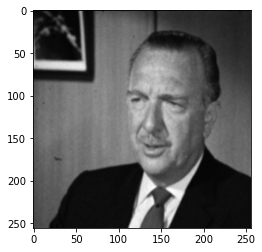

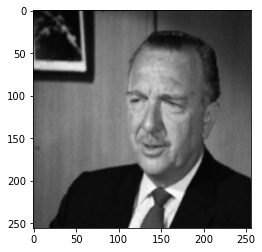

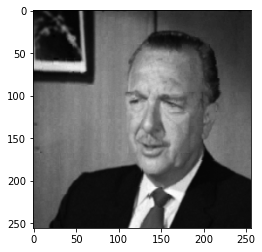

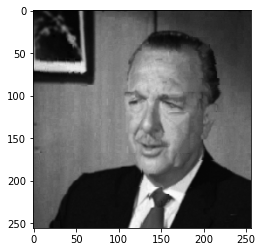

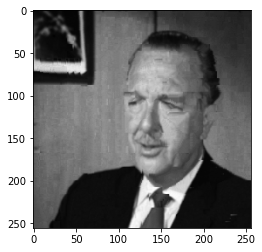

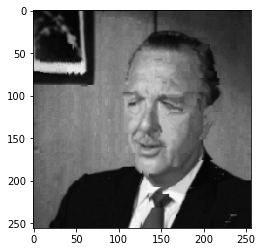

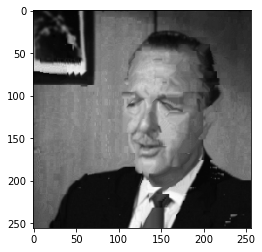

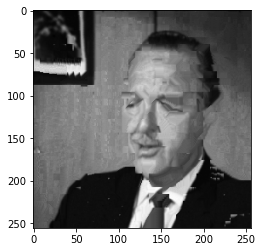

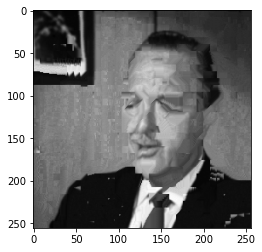

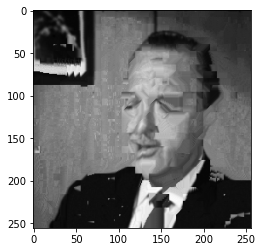

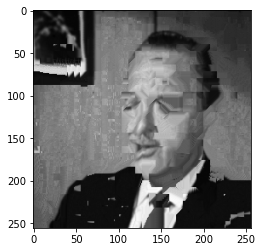

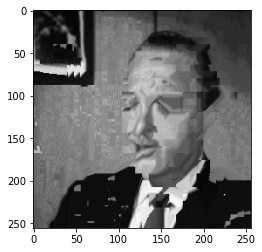

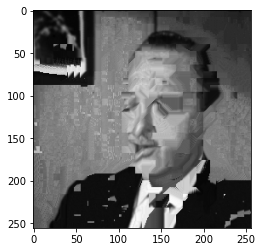

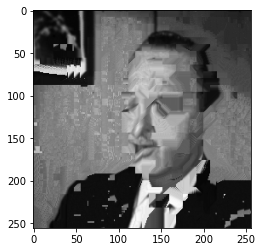

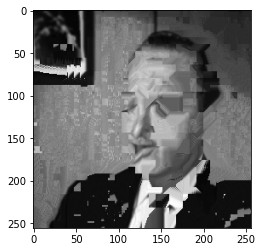

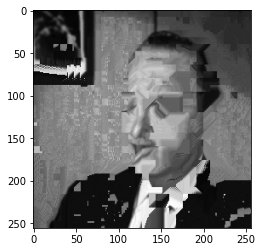

In [431]:
for im in All_img:
    im_s = Image.fromarray(im, 'L')
    plt.imshow(im_s, cmap = 'gray')
    plt.show()

In [433]:
All_Moction_Vector[0] == All_Moction_Vector[10]

True

In [2]:
s = 8
find = [[-s, 0], [s, 0], [0, -s], [0, s], [0, 0]]

In [8]:
for i in range(-1, 2 ,1):
    for l in range(-1, 2, 1):
        print(i, l)

-1 -1
-1 0
-1 1
0 -1
0 0
0 1
1 -1
1 0
1 1


In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

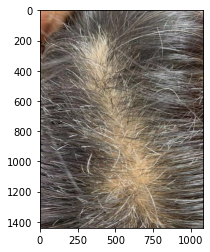

In [170]:
Img = Image.open("hair/Final_Project_Example.jpg")
plt.imshow(Img)
plt.show()
img = np.array(Img)

In [171]:
red_h = [0] * 256
green_h = [0] * 256
blue_h = [0] * 256
gray_h = [0] * 256
for i in range(img.shape[0]):
    for l in range(img.shape[1]):
        red_h[img[i, l, 0]] += 1
        green_h[img[i, l, 1]] += 1
        blue_h[img[i, l, 2]] += 1
        gray_h[int(0.3 * int(img[i, l, 0]) + 0.3 * int(img[i, l, 1]) + 0.4 * int(img[i, l, 2]))] += 1

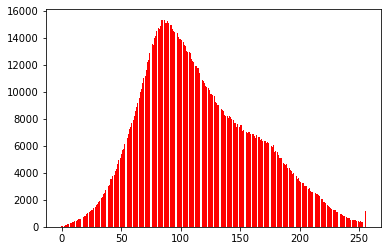

In [172]:
import matplotlib.pyplot as plt
plt.bar(list(range(0, 256)), red_h, color = 'r')
plt.show()

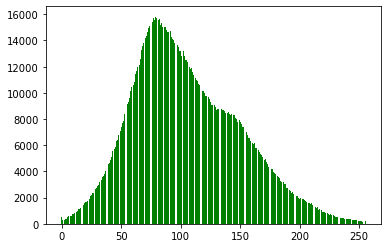

In [173]:
plt.bar(list(range(0, 256)), green_h, color = 'g')
plt.show()

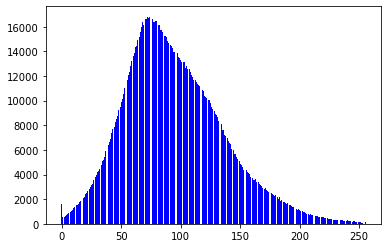

In [174]:
plt.bar(list(range(0, 256)), blue_h, color = 'blue')
plt.show()

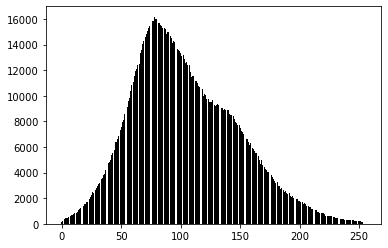

In [175]:
plt.bar(list(range(0, 256)), gray_h, color = 'black')
plt.show()

In [176]:
img1 = np.zeros((img.shape[0], img.shape[1]))
for i in range(img1.shape[0]):
    for l in range(img1.shape[1]):
        img1[i, l] = 0.2989 * img[i, l, 0] + 0.5870 * img[i, l, 1] + 0.1140 * img[i, l, 2]

In [20]:
gray_h.index(max(gray_h))

78

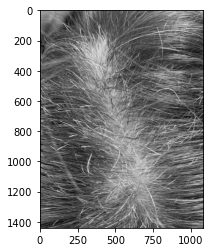

In [177]:
#img1[img1 <= 50] = 255
#img1[img1 >= 200] = 255

im_s = Image.fromarray(img1)
plt.imshow(im_s, cmap = 'gray')
plt.show()

In [22]:
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

NameError: name 'grayscale_image' is not defined

In [ ]:
im_s = Image.fromarray(mask)
plt.imshow(im_s)
plt.show()

In [94]:
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
blackhat = cv2.morphologyEx(img1, cv2.MORPH_BLACKHAT, kernel)

In [92]:
robert = np.zeros((img1.shape[0], img1.shape[1]), dtype=np.uint8)
for i in range(img1.shape[0] - 1):
    for l in range(img1.shape[1] - 1):
        robert[i, l] = abs(int(img1[i, l]) - int(img1[i + 1, l + 1])) + abs(int(img1[i + 1, l]) - int(img1[i, l + 1]))

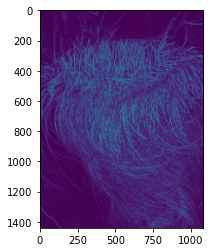

In [93]:
im_s = Image.fromarray(robert)
plt.imshow(im_s)
plt.show()

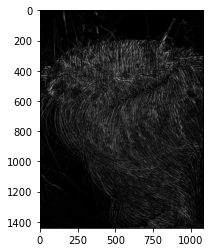

In [95]:
im_s = Image.fromarray(blackhat)
plt.imshow(im_s)
plt.show()

In [126]:
img2 = img1.copy()

In [127]:
G_filter = np.array([[2, 4, 5, 4, 2], [4, 9, 12 , 9, 4], [5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]], dtype = np.uint8)
for i in range(img2.shape[0]):
    for l in range(img2.shape[1]):
        value = 0
        for x in range(-2, 3):
            for y in range(-2, 3):
                if(i + x < 0):
                    pick_x = i + x + img2.shape[0]
                elif(i + x >= img2.shape[0]):
                    pick_x = i + x - img2.shape[0]
                else:
                    pick_x = i + x

                if(l + y < 0):
                    pick_y = l + y + img2.shape[1]
                elif(l + y >= img2.shape[1]):
                    pick_y = l + y -img2.shape[1]
                else:
                    pick_y = l + y
                value += (int(G_filter[2 + x, 2 + y]) * int(img1[pick_x, pick_y]))

        value /= 159
        if(value < 0):
            img2[i, l] = 0
        elif(value > 255):
            img2[i, l] = 255
        else:
            img2[i, l] = value

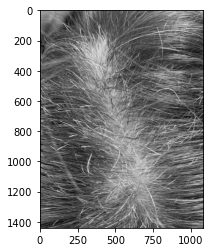

In [207]:
im_s = Image.fromarray(img2)
plt.imshow(im_s)
plt.show()

In [129]:
img3 = np.zeros((img2.shape[0], img2.shape[1]), dtype=np.uint8)
angle = np.zeros((img2.shape[0], img2.shape[1]), dtype=np.int)
for i in range(1, img3.shape[0] - 1):
    for l in range(1, img3.shape[1] - 1):
        Gx = (int(img2[i - 1, l + 1]) + 2 * int(img2[i, l + 1]) + int(img2[i + 1, l + 1]))
        Gx = abs(Gx - (int(img2[i - 1, l - 1]) + 2 * int(img2[i, l - 1]) + int(img2[i + 1, l - 1])))
        Gy = (int(img2[i + 1, l - 1]) + 2 * int(img2[i + 1, l]) + int(img2[i + 1, l + 1]))
        Gy = abs(Gy - (int(img2[i - 1, l - 1]) + 2 * int(img2[i - 1, l]) + int(img2[i - 1, l + 1])))
        if(Gx + Gy < 0):
            img3[i, l] = 0
        elif(Gx + Gy > 255):
            img3[i, l] = 255
        else:
            img3[i, l] = Gx + Gy

        ang = np.arctan2(Gy, Gx)
        ang = ang * 180. / np.pi
        if(ang < 0): ang += 180
        angle[i, l] = ang

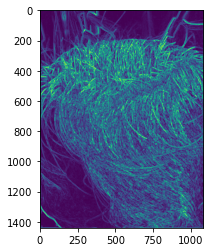

In [164]:
im_s = Image.fromarray(img3)
plt.imshow(im_s)
plt.show()

In [131]:
img4 = np.zeros((img3.shape[0], img3.shape[1]), dtype=np.uint8)

for i in range(1, img4.shape[0] - 1):
    for l in range(1, img4.shape[1] - 1):
        pixel_1 = 255
        pixel_2 = 255

        #angle 0
        if(0 <= angle[i, l] < 22.5 or 157.5 <= angle[i, l] <= 180):
            pixel_1 = img3[i, l + 1]
            pixel_2 = img3[i, l - 1]
        #angle 45
        elif(22.5 <= angle[i, l] < 67.5):
            pixel_1 = img3[i - 1, l + 1]
            pixel_2 = img3[i + 1, l - 1]
        #angle 90
        elif(67.5 <= angle[i, l] < 112.5):
            pixel_1 = img3[i - 1, l]
            pixel_2 = img3[i + 1, l]
        #angle 135
        elif(112.5 <= angle[i, l] < 157.5):
            pixel_1 = img3[i - 1, l - 1]
            pixel_2 = img3[i + 1, l + 1]

        if(img3[i, l] >= pixel_1 and img3[i, l] >= pixel_2):
            img4[i, l] = img3[i, l]
        else:
            img4[i, l] = 0

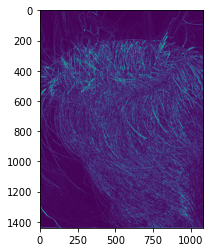

In [132]:
im_s = Image.fromarray(img4)
plt.imshow(im_s)
plt.show()

In [134]:
upper_bound = 255 * 0.8	#204
lower_bound = 255 * 0.2 #51
img5 = np.zeros((img4.shape[0], img4.shape[1]), dtype=np.uint8)
for i in range(1, img5.shape[0] - 1):
    for l in range(1, img5.shape[1] - 1):
        if(img4[i, l] > upper_bound):
            img5[i, l] = img4[i, l]
        elif(img4[i, l] < lower_bound):
            img4[i, l] = 0
        else:
            count = 0
            for x in range(-1, 2):
                for y in range(-1, 2):
                    if(img4[i + x, l + y] > upper_bound):
                        count += 1
            if(count >= 2):
                img5[i, l] = img4[i, l]
            else:
                img5[i, l] = 0

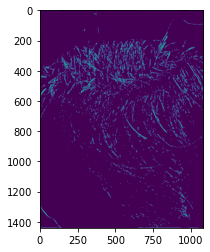

In [135]:
im_s = Image.fromarray(img5)
plt.imshow(im_s)
plt.show()

In [165]:
img6 = img.copy()
for i in range(img6.shape[0]):
    for l in range(img6.shape[1]):
        if(img3[i, l] > 50):
            img6[i, l] = np.array([255, 0, 0])

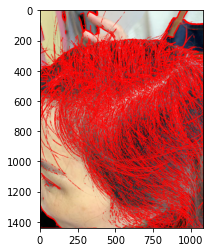

In [166]:
im_s = Image.fromarray(img6)
plt.imshow(im_s)
plt.show()

In [ ]:
for i in range(img2.shape[0]):
    for l in range(img2.shape[1]):
        if(img[i, l] > 25):
            img2[i, l] = np.array([255, 0, 0])

In [33]:
img2[0, 0] = np.array([0, 0, 0])

In [167]:
robert_his = [0] * 256
for i in range(robert.shape[0]):
    for l in range(robert.shape[1]):
        robert_his[int(img3[i, l])] += 1

In [168]:
robert

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 3, 0],
       [0, 0, 0, ..., 7, 4, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

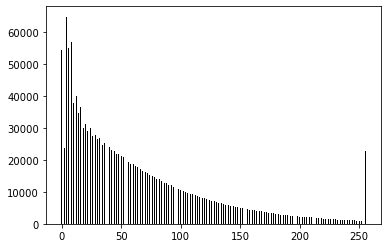

In [169]:
plt.bar(list(range(0, 256)), robert_his, color = 'black')
plt.show()

In [109]:
robert_his.index(max(robert_his))

2

In [178]:
import cv2

In [179]:
img2 = img1.copy()
cv2.GaussianBlur(img2, (5, 5), 0)

array([[168.303375  , 168.6783375 , 169.54543828, ..., 147.24252734,
        146.62540156, 146.35980312],
       [167.63937891, 168.00262383, 168.83457187, ..., 146.23460117,
        145.8088625 , 145.62919297],
       [166.38950391, 166.70587852, 167.42065078, ..., 143.71727578,
        143.81101641, 143.86569844],
       ...,
       [ 84.54558594,  82.69030273,  78.62820898, ...,  79.68534727,
         78.60342422,  78.25970859],
       [ 72.56240938,  70.31263438,  65.45765117, ...,  76.43309297,
         73.60134492,  72.51942187],
       [ 65.906825  ,  63.64142656,  58.88408984, ...,  72.96535312,
         69.52038516,  68.16895781]])

In [205]:
img3 = np.zeros((img2.shape[0], img2.shape[1]), dtype = np.uint8)
for i in range(img3.shape[0] - 1):
    for l in range(img3.shape[1] - 1):
        img3[i, l] = abs(int(img2[i, l]) - int(img2[i + 1, l + 1])) + abs(int(img2[i + 1, l]) - int(img2[i, l + 1]))

img_result = img.copy()
for i in range(img_result.shape[0]):
    for l in range(img_result.shape[1]):
        if(15 < img3[i, l] < 100):
            img_result[i, l] = (255, 0, 0)

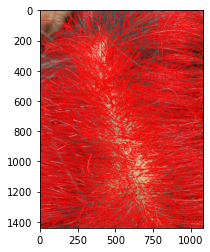

In [206]:
im_s = Image.fromarray(img_result)
plt.imshow(im_s)
plt.show()

In [189]:
his = [0] * 256
for i in range(img3.shape[0]):
    for l in range(img3.shape[1]):
        his[int(img3[i, l])] += 1

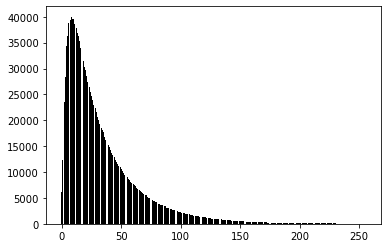

In [190]:
plt.bar(list(range(0, 256)), his, color = 'black')
plt.show()